In [4]:
#import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
import numpy

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#load data
df = pd.read_csv("E://EXCELR//Data science//Data science assignment//16) Neural Networks//forestfires.csv")
df.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [7]:
df.shape

(517, 31)

In [8]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [11]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset["month"] = label_encoder.fit_transform(dataset["month"])
dataset["day"] = label_encoder.fit_transform(dataset["day"])
dataset["size_category"] = label_encoder.fit_transform(dataset["size_category"])

In [13]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [14]:
# split into input (X) and output (Y) variables
X = dataset.iloc[:,:11]
Y = dataset.iloc[:,-1]

In [15]:
# Build an ANN model
model = Sequential()
model.add(layers.Dense(50, input_dim=11,  activation='relu'))
model.add(layers.Dense(11,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100


35/35 [==============================] - 2s 11ms/step - loss: 3.3048 - acc: 0.6098 - val_loss: 5.4084 - val_acc: 0.7193
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 2.1491 - acc: 0.6965 - val_loss: 2.7204 - val_acc: 0.6374
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 1.0260 - acc: 0.7254 - val_loss: 1.4680 - val_acc: 0.7368
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5371 - acc: 0.8092 - val_loss: 1.2520 - val_acc: 0.7778
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5313 - acc: 0.7861 - val_loss: 1.2725 - val_acc: 0.7719
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3832 - acc: 0.8382 - val_loss: 1.0246 - val_acc: 0.7836
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3219 - acc: 0.8757 - val_loss: 0.9376 - val_acc: 0.8012
Epoch 8/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3296 

Epoch 60/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0441 - acc: 0.9855 - val_loss: 0.1109 - val_acc: 0.9415
Epoch 61/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0335 - acc: 0.9942 - val_loss: 0.2480 - val_acc: 0.9123
Epoch 62/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0580 - acc: 0.9798 - val_loss: 0.1083 - val_acc: 0.9474
Epoch 63/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0461 - acc: 0.9798 - val_loss: 0.1177 - val_acc: 0.9591
Epoch 64/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0493 - acc: 0.9827 - val_loss: 0.1091 - val_acc: 0.9591
Epoch 65/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0444 - acc: 0.9798 - val_loss: 0.1124 - val_acc: 0.9532
Epoch 66/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0421 - acc: 0.9884 - val_loss: 0.1426 - val_acc: 0.9474
Epoch 67/100
35/35 [==============================] - 0s 4ms/step - loss: 0.

In [18]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0436 - acc: 0.9845
acc: 98.45%


In [19]:
# Graphical Visualization
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

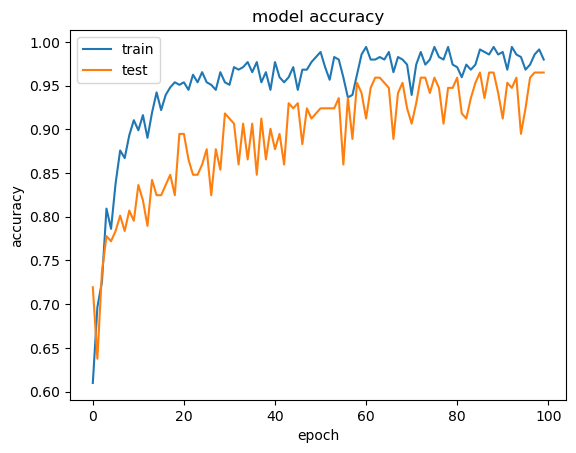

In [20]:
# summarize history for accuracy
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

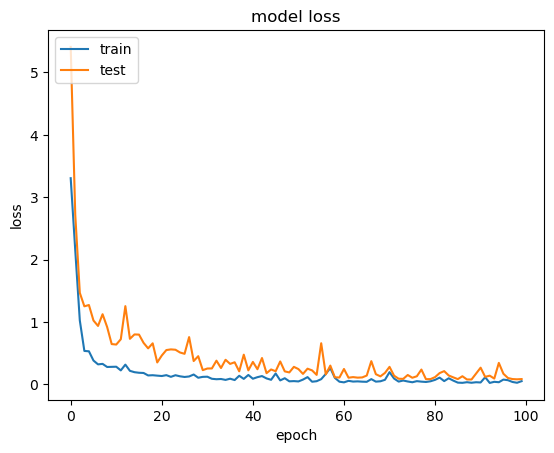

In [21]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()